In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
ds = pd.read_csv('/content/annual_temp.csv')
ds

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687
...,...,...,...
267,GISTEMP,1882,-0.1000
268,GCAG,1881,-0.0707
269,GISTEMP,1881,-0.1200
270,GCAG,1880,-0.1247


In [2]:
ds1=ds.iloc[::2]
ds2=ds.iloc[1::2]

In [3]:
X=ds1.iloc[0:,1:-1].values

In [5]:
y1=ds1.iloc[0:,-1:].values

In [6]:
y2=ds2.iloc[0:,-1:].values

<Axes: xlabel='Year', ylabel='Mean'>

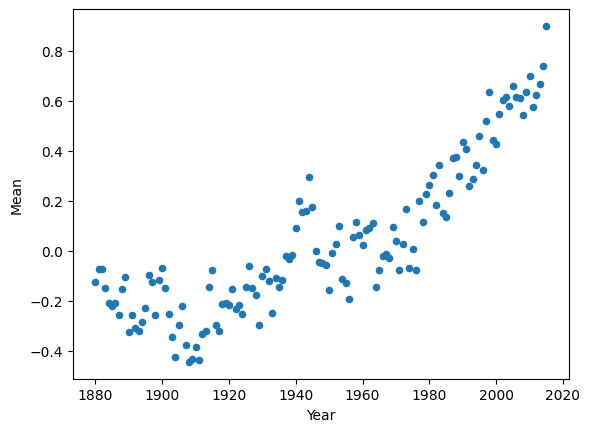

In [7]:
ds1.plot.scatter(y='Mean' , x='Year')

<Axes: xlabel='Year', ylabel='Mean'>

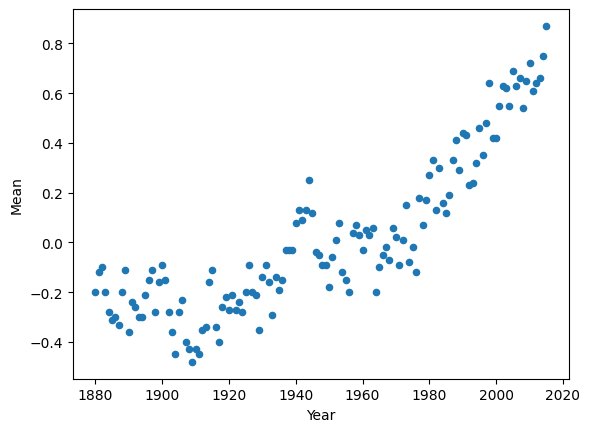

In [8]:
ds2.plot.scatter(y='Mean' , x='Year')

In [182]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.25, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.25, random_state = 42)

# **RANDOM FOREST REGRESSOR**

In [268]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 140, random_state =1)
regressor2 = RandomForestRegressor(n_estimators = 140, random_state =1)
regressor.fit(X_train1, y_train1)
regressor2.fit(X_train2, y_train2)

<ipython-input-268-c476561f4162>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train1, y_train1)
<ipython-input-268-c476561f4162>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor2.fit(X_train2, y_train2)


RandomForestRegressor(n_estimators=140, random_state=1)

<ipython-input-261-af8ba4e5dd56>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train1), max(X_train1), 0.01)


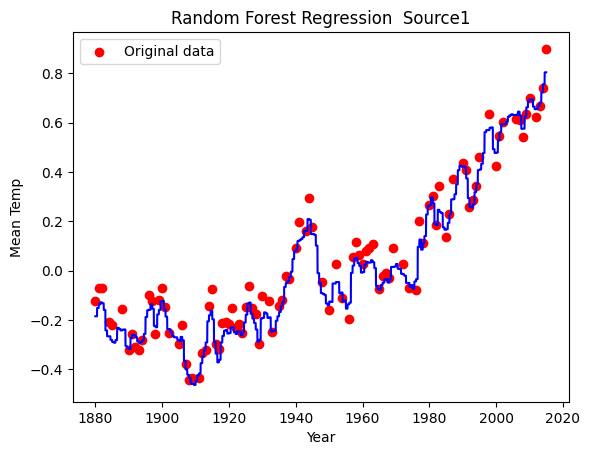

Predicted value for the year 2016: 0.8040714285714291
Accuracy:  89.61610992619752


In [261]:
X_grid = np.arange(min(X_train1), max(X_train1), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train1, y_train1, color='red', label='Original data')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.xlabel('Year')
plt.ylabel('Mean Temp')
plt.title('Random Forest Regression  Source1')
plt.legend()
plt.show()

def predict_for_year(year):
    return regressor.predict([[year]])

year_to_predict = 2016
prediction = predict_for_year(year_to_predict)
print(f"Predicted value for the year {year_to_predict}: {prediction[0]}")
print("Accuracy: ",regressor.score(X_test1,y_test1)* 100)



In [267]:
def predict_for_year(year):
    return regressor.predict([[year]])

year_to_predict = 2016
prediction = predict_for_year(year_to_predict)
print(f"Predicted value for the year {year_to_predict}: {prediction[0]}")

year_to_predict = 2017
prediction = predict_for_year(year_to_predict)
print(f"Predicted value for the year {year_to_predict}: {prediction[0]}")


Predicted value for the year 2016: 0.8040714285714291
Predicted value for the year 2017: 0.8040714285714291


<ipython-input-270-b2d7cd1b883c>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train2), max(X_train2), 0.01)


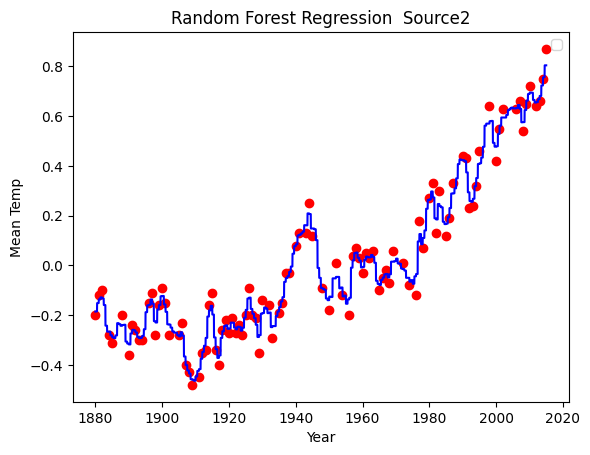

Accuracy:  90.0645441318369


In [270]:
X_grid = np.arange(min(X_train2), max(X_train2), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train2, y_train2, color='red')
plt.plot(X_grid, regressor2.predict(X_grid), color = 'blue')
plt.xlabel('Year')
plt.ylabel('Mean Temp')
plt.title('Random Forest Regression  Source2')
plt.legend()
plt.show()

print("Accuracy: ",regressor2.score(X_test2,y_test2)* 100)



In [271]:
def predict_for_year(year):
    return regressor.predict([[year]])

year_to_predict = 2016
prediction = predict_for_year(year_to_predict)
print(f"Predicted value for the year {year_to_predict}: {prediction[0]}")

year_to_predict = 2017
prediction = predict_for_year(year_to_predict)
print(f"Predicted value for the year {year_to_predict}: {prediction[0]}")


Predicted value for the year 2016: 0.8196314285714293
Predicted value for the year 2017: 0.8196314285714293


# **LINEAR REGRESSOR**

In [227]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train1, y_train1)
regressor.fit(X_train2, y_train2)

LinearRegression()

<ipython-input-229-517a870e6f8b>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train1), max(X_train1), 0.01)


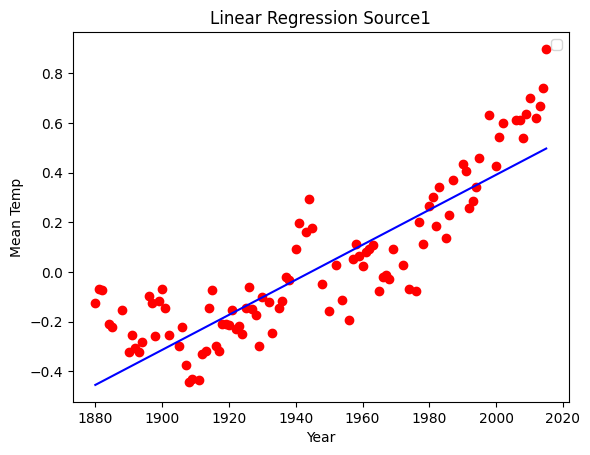

Accuracy:  73.8165960710989


In [229]:
X_grid = np.arange(min(X_train1), max(X_train1), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train1, y_train1, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.xlabel('Year')
plt.ylabel('Mean Temp')
plt.title('Linear Regression Source1')
plt.legend()
plt.show()

print("Accuracy: ",regressor.score(X_test1,y_test1)* 100)

<ipython-input-230-1c9726765f9b>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train2), max(X_train2), 0.01)


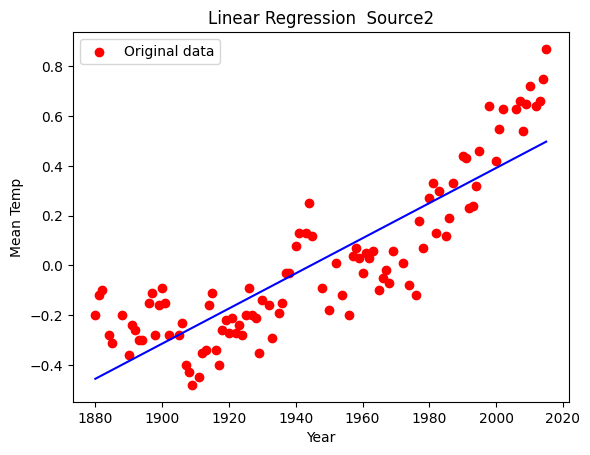

Accuracy:  75.19966365274368


In [230]:
X_grid = np.arange(min(X_train2), max(X_train2), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train2, y_train2, color='red', label='Original data')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.xlabel('Year')
plt.ylabel('Mean Temp')
plt.title('Linear Regression  Source2')
plt.legend()
plt.show()


print("Accuracy: ",regressor.score(X_test2,y_test2)* 100)

# **POLINOMIAL REGRESSION**

In [275]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=90)
X_poly_train = poly_features.fit_transform(X_train1)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train1)

poly_features2 = PolynomialFeatures(degree=90)
X_poly_train2 = poly_features2.fit_transform(X_train2)
poly_reg2 = LinearRegression()
poly_reg2.fit(X_poly_train2, y_train2)


LinearRegression()

<ipython-input-277-fe7ae2061a89>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train1), max(X_train1), 0.01)


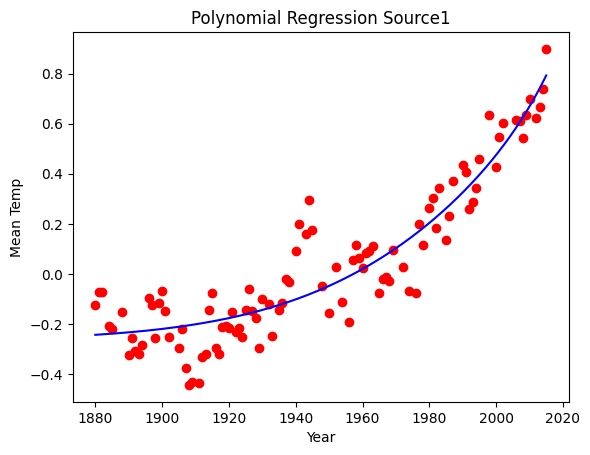

Accuracy:  86.47644131694854


In [277]:
X_grid = np.arange(min(X_train1), max(X_train1), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train1, y_train1, color = 'red')
plt.plot(X_grid, poly_reg.predict(poly_features.fit_transform(X_grid)),color = 'blue')
plt.title('Polynomial Regression Source1')
plt.xlabel('Year')
plt.ylabel('Mean Temp')
plt.show()


X_test_poly = poly_features.transform(X_test1)
print("Accuracy: ", poly_reg.score(X_test_poly, y_test1) * 100)

<ipython-input-274-e84c574e21ed>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train2), max(X_train2), 0.01)


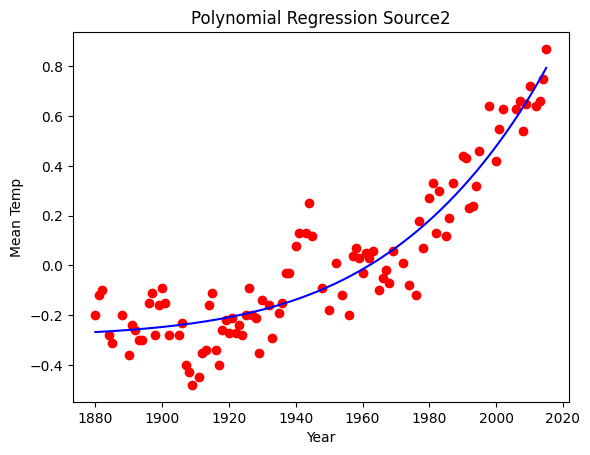

Accuracy:  87.76043360327257


In [274]:
X_grid = np.arange(min(X_train2), max(X_train2), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train2, y_train2, color = 'red')
plt.plot(X_grid, poly_reg2.predict(poly_features2.fit_transform(X_grid)),color = 'blue')
plt.title('Polynomial Regression Source2')
plt.xlabel('Year')
plt.ylabel('Mean Temp')
plt.show()


X_test_poly2 = poly_features2.transform(X_test2)
print("Accuracy: ", poly_reg2.score(X_test_poly2, y_test2) * 100)

# ***DECISION TREE REGRESSION ***



In [241]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor2 = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train1, y_train1)
regressor2.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

<ipython-input-247-ea57022f15c9>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train1), max(X_train1), 0.01)


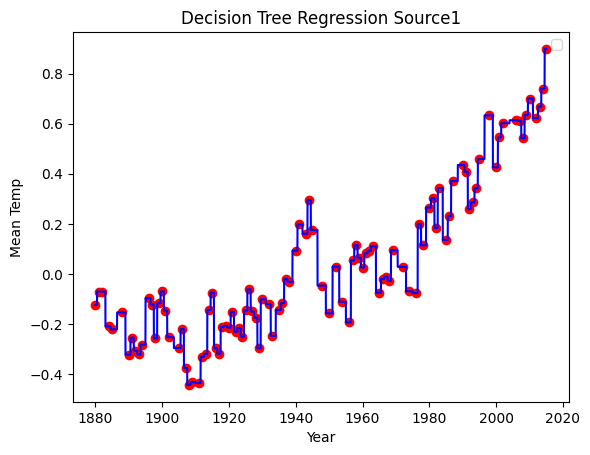

Accuracy:  86.76590228261398


In [247]:
X_grid = np.arange(min(X_train1), max(X_train1), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train1, y_train1, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.xlabel('Year')
plt.ylabel('Mean Temp')
plt.title('Decision Tree Regression Source1')
plt.legend()
plt.show()


print("Accuracy: ",regressor.score(X_test1,y_test1)* 100)

<ipython-input-246-ca28acc60691>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train2), max(X_train2), 0.01)


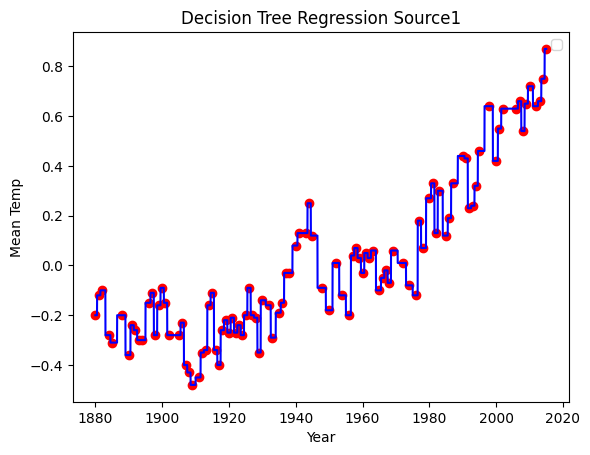

Accuracy:  86.93544354707218


In [246]:
X_grid = np.arange(min(X_train2), max(X_train2), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train2, y_train2, color='red')
plt.plot(X_grid, regressor2.predict(X_grid), color = 'blue')
plt.xlabel('Year')
plt.ylabel('Mean Temp')
plt.title('Decision Tree Regression Source1')
plt.legend()
plt.show()

print("Accuracy: ",regressor2.score(X_test2,y_test2)* 100)

# **CONCLUSION ***

After comparing all of the studied models it is observed that Random Forest Regression gives 90% accurate results.